# T/S Diagram from ECCO

In [1]:
from dask.distributed import Client

client = Client("tcp://10.32.16.243:35175")
client

Client Scheduler: tcp://10.32.16.243:35175 Dashboard: /user/0000-0002-8176-9465/proxy/8787/status,Cluster Workers: 30 Cores: 60 Memory: 345.00 GB


In [3]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
import fsspec
import xmitgcm
from xhistogram.xarray import histogram
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
%matplotlib inline
import gsw

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['geojson', 'postgis', 'shapefile', 'spatialite'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [4]:
from xmovie import Movie

ModuleNotFoundError: No module named 'xmovie'

In [5]:
from xhistogram.xarray import histogram
import numpy as np
from matplotlib.colors import LogNorm

In [12]:
ds = xr.open_zarr(gcsfs.GCSFileSystem(requester_pays=True).get_mapper('pangeo-ecco-eccov4r3/eccov4r3'), consolidated=True)

In [13]:
ds_ll = faces_dataset_to_latlon(ds)
ds_ll_drop = ds_ll.drop(['i', 'j', 'i_g', 'j_g', 'k', 'k_u', 'k_l', 'k_p1'])

In [14]:
# a trick to make things work a bit faster
#coords = ds_ll_drop.coords.to_dataset().reset_coords().roll(i=50, i_g=50)
#ds = ds_ll_drop.reset_coords(drop=True).roll(i=50, i_g=50)

coords = ds_ll_drop.coords.to_dataset().reset_coords().roll(i=100, i_g=100)
ds = ds_ll_drop.reset_coords(drop=True).roll(i=100, i_g=100)
ds

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  """
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  


<xarray.Dataset>
Dimensions:    (face: 13, i: 360, i_g: 360, j: 270, j_g: 270, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 288, time_snp: 287)
Coordinates:
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * time_snp   (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-01
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: i, i_g, j, j_g, k, k_l, k_p1, k_u
Data variables:
    ADVr_SLT   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ADVr_TH    (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrE_SLT   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrE_TH    (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrI_SLT   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrI_TH    (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ETAN       (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    ETAN_snp   (time_snp, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    GEOFLX     (j, i) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    SALT       (time, k, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    SALT_snp   (time_snp, k, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    SFLUX      (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    TFLUX      (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    THETA      (time, k, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    THETA_snp  (time_snp, k, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    WVELMASS   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    oceFWflx   (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    oceQsw     (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    oceSPtnd   (time, k, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ADVx_SLT   (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ADVy_SLT   (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>
    ADVx_TH    (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>
    DFxE_SLT   (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFyE_SLT   (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>
    DFxE_TH    (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFyE_TH    (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>
    UVELMASS   (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    VVELMASS   (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>

In [6]:
lower_lat = 30 #~-80˚
upper_lat = 80 #-61.755745˚
left_lon = 72 #~-65.5˚ `coords.XC.isel(i=72).load()`
right_lon = 168 #~30.5˚ `coords.XC.isel(i=168).load()`

In [7]:
#set the boundaries
lat_range = dict(j=slice(lower_lat, upper_lat))
lon_range = dict(i=slice(left_lon, right_lon))

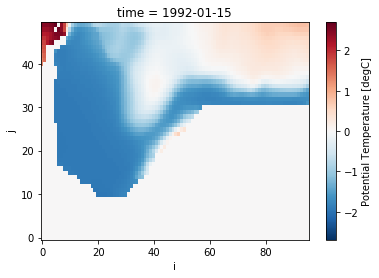

In [9]:
ds.THETA[0,0].isel(**lat_range, **lon_range).plot()

## **TRY TO PLOT EVERY TIMESTEP WITH XMOVIE**

### Juliu's XMovie package

In [ ]:
def custom_plotfunc(ds, fig, tt, salt=ds.SALT, temp=ds.THETA, Z=coords.Z):

    salt = salt.isel(time=tt, **lat_range, **lon_range)
    temp = temp.isel(time=tt, **lat_range, **lon_range)
    
    _, _, lev_broadcasted = xr.broadcast(salt, temp, coords.Z)
    
    ax = fig.subplots()
    
    scat = ax.scatter(salt, temp, c=abs(lev_broadcasted), marker='.', s=0.5)
    fig.colorbar(scat, label='Depth [m]', shrink=0.8, ticks=np.arange(0, 6000, 1000))
    
    ax.set_xlim(33.4, 35)
    ax.set_ylim(-2, 1.2)

    ax.set_xlabel('Salinity [psu]')
    ax.set_ylabel('Potential Temperature [˚C]')
    ax.set_title('T-S Diagram of Weddell Gyre \n 1992-2016 (ECCO)', fontsize=20)
    
    fig.subplots_adjust(top=0.8)
    
    return ax, scat

In [ ]:
#creating movie object
mov = Movie(ds.time, plotfunc=custom_plotfunc, 
            salt=ds.SALT, temp=ds.THETA, 
            Z=coords.Z, input_check=False, dpi=150)

In [ ]:
#frame preview
mov.preview(3)

In [ ]:
#create a movie!

#ds = ds.isel(time=slice(0, 10))

mov = Movie(ds.time, plotfunc=custom_plotfunc, 
            salt=ds.SALT, 
            temp=ds.THETA, 
            Z=coords.Z, input_check=False)
mov.save('movie_full_ECCO.mp4', progress=True)

# xhistogram T/S Diagram from ECCO

In [8]:
#salt_bins = np.linspace(31.5, 35.5, 100)
#theta_bins = np.linspace(-2, 4, 100)
salt_bins = np.linspace(31, 35, 100)
theta_bins = np.linspace(-2.5, 8, 100)
delta_salt = salt_bins[1] - salt_bins[0]
delta_theta = theta_bins[1] - theta_bins[0]

vol = (coords.hFacC * coords.rA * coords.drF).sel(**lat_range, **lon_range)

In [11]:
vol.sum().values

array(1.6615513e+16, dtype=float32)

In [8]:
salt = ds.SALT.isel(**lat_range, **lon_range)
temp = ds.THETA.isel(**lat_range, **lon_range)

NameError: name 'ds' is not defined

In [10]:
ts_hist = histogram(temp, salt, bins=[theta_bins, salt_bins],
                    weights=vol, dim=['i', 'j', 'k']).rename({'THETA_bin':'theta_bin',
                                                              'SALT_bin':'salt_bin'}) / (delta_salt * delta_theta)
ts_hist

<xarray.DataArray 'histogram_THETA_SALT' (time: 288, theta_bin: 99, salt_bin: 99)>
dask.array<truediv, shape=(288, 99, 99), dtype=float64, chunksize=(1, 99, 99), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * theta_bin  (theta_bin) float64 -2.447 -2.341 -2.235 ... 7.735 7.841 7.947
  * salt_bin   (salt_bin) float64 31.02 31.06 31.1 31.14 ... 34.9 34.94 34.98

In [11]:
#taking hist mean over `time` takes average (notice the scales are diff in either plots)
ts_hist_mean = ts_hist.mean(dim='time')

In [12]:
ts_hist_mean.to_netcdf('ts_hist_mean_ECCO.nc', mode='w')

# Load in `ts_hist_mean_ECCO.nc` ds and plot

In [9]:
ts_hist_mean = xr.open_dataarray('ts_hist_mean_ECCO.nc')

In [10]:
ts_hist_mean

<xarray.DataArray 'histogram_THETA_SALT' (theta_bin: 99, salt_bin: 99)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * theta_bin  (theta_bin) float64 -2.447 -2.341 -2.235 ... 7.735 7.841 7.947
  * salt_bin   (salt_bin) float64 31.02 31.06 31.1 31.14 ... 34.9 34.94 34.98

Text(0, 0.5, 'Potential Temperature [˚C]')

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


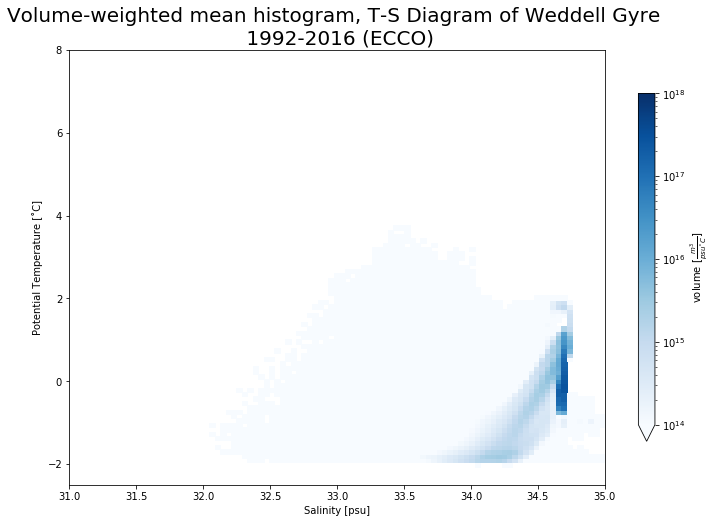

In [11]:
ts_hist_mean.where(ts_hist_mean>0).plot(norm=LogNorm(), figsize=(12,8), 
                                        cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'},
                                        cmap='Blues', vmin=1e14, vmax=1e18)

plt.title('Volume-weighted mean histogram, T-S Diagram of Weddell Gyre \n 1992-2016 (ECCO)', fontsize=20)
plt.xlabel('Salinity [psu]')
plt.ylabel('Potential Temperature [˚C]')

# Adding isopycnal contours & potential temp/abs salt
to xhistogram plot

In [15]:
lat = coords.j.isel(**lat_range)
lon = coords.i.isel(**lon_range)

In [20]:
salt = ds.SALT.isel(**lat_range, **lon_range)
temp = ds.THETA.isel(**lat_range, **lon_range)

In [21]:
#change levels to pressure
pressure = xr.apply_ufunc(gsw.p_from_z, coords.Z, lat, 
                          output_dtypes=[float, ],
                          dask='parallelized').reset_coords(drop=True)

In [22]:
#change practical salinity [psu] to absolute salinity [g/kg]
sa = xr.apply_ufunc(gsw.SA_from_SP, salt, pressure, lon, lat,
                    output_dtypes=[salt.dtype],
                    dask='parallelized').reset_coords(drop=True)
sa.name = 'SA'

In [23]:
#change potential temperature to conservative temperature
ct = xr.apply_ufunc(gsw.CT_from_pt, sa, temp,
                    output_dtypes=[temp.dtype],
                    dask='parallelized').reset_coords(drop=True)
ct.name = 'CT'

In [24]:
salt_bins = np.linspace(31, 35, 100)
theta_bins = np.linspace(-2.5, 8, 100)
delta_salt = salt_bins[1] - salt_bins[0]
delta_theta = theta_bins[1] - theta_bins[0]

vol = (coords.hFacC * coords.rA * coords.drF).isel(**lat_range, **lon_range)

In [25]:
ts_hist = histogram(ct, sa, bins=[theta_bins, salt_bins],
                    weights=vol, dim=['i', 'j', 'k']).rename({'CT_bin':'theta_bin',
                                                              'SA_bin':'salt_bin'}) / (delta_salt * delta_theta)
ts_hist

<xarray.DataArray 'histogram_CT_SA' (time: 288, theta_bin: 99, salt_bin: 99)>
dask.array<truediv, shape=(288, 99, 99), dtype=float64, chunksize=(1, 99, 99), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * theta_bin  (theta_bin) float64 -2.447 -2.341 -2.235 ... 7.735 7.841 7.947
  * salt_bin   (salt_bin) float64 31.02 31.06 31.1 31.14 ... 34.9 34.94 34.98

In [26]:
ts_hist_mean = ts_hist.mean(dim='time')

In [27]:
sigma = xr.apply_ufunc(gsw.sigma2, ts_hist_mean.salt_bin, ts_hist_mean.theta_bin)
sigma

<xarray.DataArray (salt_bin: 99, theta_bin: 99)>
array([[34.3782787 , 34.37058629, 34.3627531 , ..., 33.05715848,
        33.03775059, 33.01823613],
       [34.41029179, 34.40258634, 34.39474013, ..., 33.08802168,
        33.06860296, 33.04907768],
       [34.44230499, 34.4345865 , 34.42672727, ..., 33.11888512,
        33.09945557, 33.07991948],
       ...,
       [37.45206955, 37.44313469, 37.43406089, ..., 36.02114602,
        36.0007019 , 35.98015348],
       [37.48409405, 37.47514634, 37.46605973, ..., 36.05203303,
        36.03157817, 36.01101902],
       [37.51611866, 37.50715812, 37.49805869, ..., 36.08292031,
        36.06245469, 36.04188481]])
Coordinates:
  * salt_bin   (salt_bin) float64 31.02 31.06 31.1 31.14 ... 34.9 34.94 34.98
  * theta_bin  (theta_bin) float64 -2.447 -2.341 -2.235 ... 7.735 7.841 7.947

/srv/conda/envs/notebook/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/srv/conda/envs/notebook/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/srv/conda/envs/notebook/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/srv/conda/envs/notebook/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/srv/conda/envs/notebook/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecatio

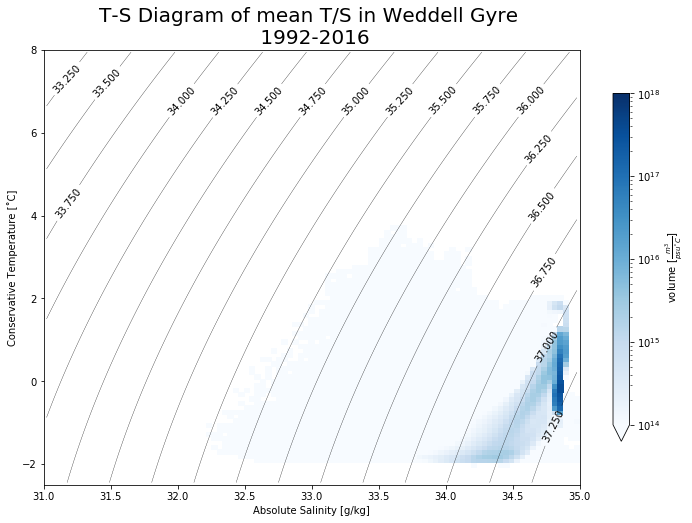

In [28]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sigma_levs = np.arange(30, 37.5, 0.25)

C = sigma.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax)
plt.clabel(C)
hist = ts_hist_mean.where(ts_hist_mean>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e14, vmax=1e18,
                                               cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'})

ax.set_xlabel('Absolute Salinity [g/kg]')
ax.set_ylabel('Conservative Temperature [˚C]')
ax.set_title('T-S Diagram of mean T/S in Weddell Gyre \n 1992-2016', fontsize=20);

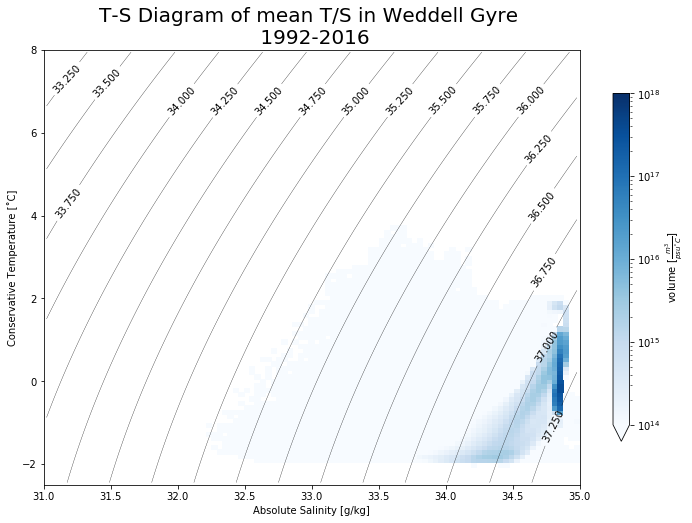

In [29]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sigma_levs = np.arange(30, 37.5, 0.25)

C = sigma.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax)
plt.clabel(C)
hist = ts_hist_mean.plot(norm=LogNorm(), cmap='Blues', vmin=1e14, vmax=1e18,
                                               cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'})

ax.set_xlabel('Absolute Salinity [g/kg]')
ax.set_ylabel('Conservative Temperature [˚C]')
ax.set_title('T-S Diagram of mean T/S in Weddell Gyre \n 1992-2016', fontsize=20);

## Movie!

In [22]:
def xhist_plot(dsr, fig, tt, salt=salt, temp=temp):

    salt = salt.isel(time=tt)
    temp = temp.isel(time=tt)

    pressure = xr.apply_ufunc(gsw.p_from_z, coords.Z, lat, output_dtypes=[coords.Z.dtype], dask='parallelized').reset_coords(drop=True)
    sa = xr.apply_ufunc(gsw.SA_from_SP, salt, pressure, lon, lat, output_dtypes=[salt.dtype], dask='parallelized').reset_coords(drop=True)
    sa.name = 'SA'
    ct = xr.apply_ufunc(gsw.CT_from_pt, sa, temp, output_dtypes=[temp.dtype], dask='parallelized').reset_coords(drop=True)
    ct.name = 'CT'
   
    sa_bins = np.linspace(31, 35, 100)
    ct_bins = np.linspace(-2.5, 8, 100)
    
    delta_sa = sa_bins[1] - sa_bins[0]
    delta_ct = ct_bins[1] - ct_bins[0]
    
    vol = (coords.hFacC * coords.rA * coords.drF).isel(**lat_range, **lon_range)
    

    
    #define sigma grid
    
    xdim_sa = np.arange(31, 35, 0.1)
    ydim_ct = np.arange(-2.5, 8, 0.1)
    
    sigma = np.empty([40, 105])
    for j in range(40):
        for i in range(105):
            sigma[j, i] = gsw.sigma2(xdim_sa[j], ydim_ct[i])
        
    #Plotting
    
    ax = fig.subplots()
    
    ts_hist = histogram(ct, sa, bins=[ct_bins, sa_bins],
                    weights=vol, dim=['i', 'j', 'k']).rename({'CT_bin':'ct_bin',
                                                              'SA_bin':'sa_bin'}) / (delta_salt * delta_theta)
    
    C = ax.contour(xdim_salt, ydim_temp, sigma.T, colors='k', linewidths=0.5)
    ax.clabel(C)
    
    hist = ts_hist.where(ts_hist>0).plot(norm=LogNorm(), ax=ax, cmap='Blues', vmin=1e14, vmax=1e18,
                                         cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'})
  
    timestamp = str(dsr.time.isel(time=tt).values)
    ax.text(x=33,y=-4.2, s=timestamp[:10], 
            fontsize=18, weight='bold', horizontalalignment='center')
    
    ax.set_title('Volume-weighted mean histogram, T-S Diagram of Weddell Gyre \n 1992-2016 (ECCO)', fontsize=20)
    ax.set_xlabel('Absolute Salinity [g/kg]')
    ax.set_ylabel('Conservative Temperature [˚C]')

    fig.subplots_adjust(top=0.8)
    
    return ax, hist

In [23]:
#creating movie object
mov = Movie(ds.time, plotfunc=xhist_plot, 
            salt=salt, temp=temp, input_check=False, dpi=150)
#mov.save('movie.mp4')

In [25]:
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


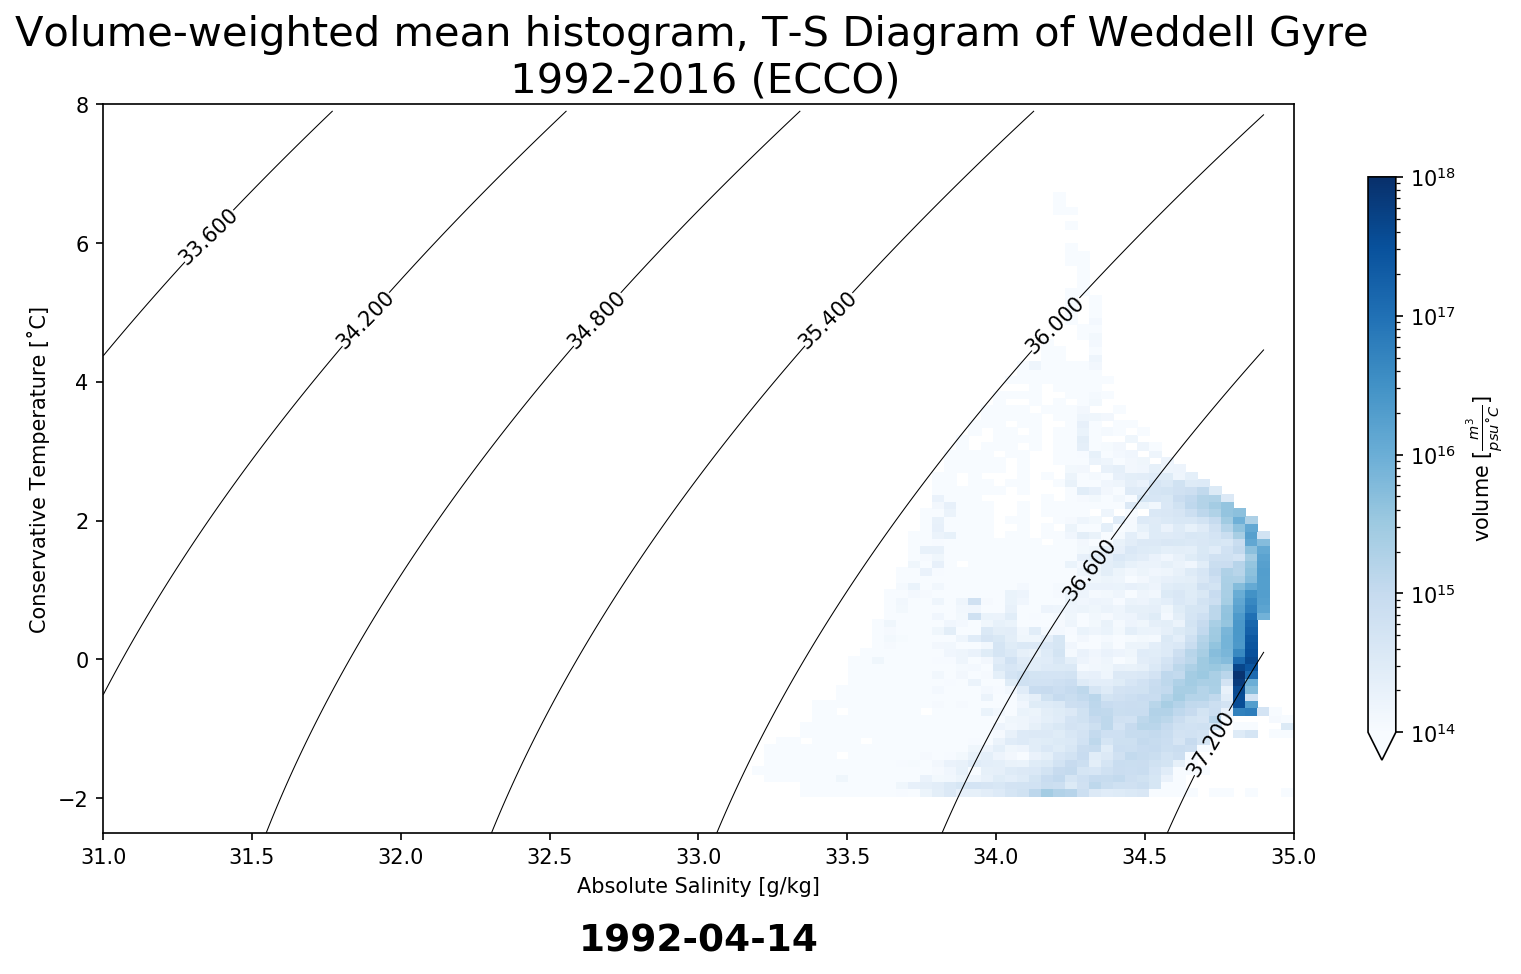

In [26]:
#frame preview
mov.preview(3)

In [ ]:
#frame preview
mov.preview(30)

In [27]:
#create a movie!

#dsr = ds.isel(time=slice(0,21))

mov = Movie(ds.time, plotfunc=xhist_plot, 
            salt=salt, 
            temp=temp, 
            input_check=False, dpi=150)

mov.save('xhist_isopycnals_ECCO_Blues.mp4', progress=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/srv/conda/envs/notebook/lib/python3.7/site-packages


Movie created at xhist_isopycnals_ECCO_Blues.mp4
